# Overregularization

based on https://arxiv.org/pdf/2303.14151.pdf, which was very interesting.

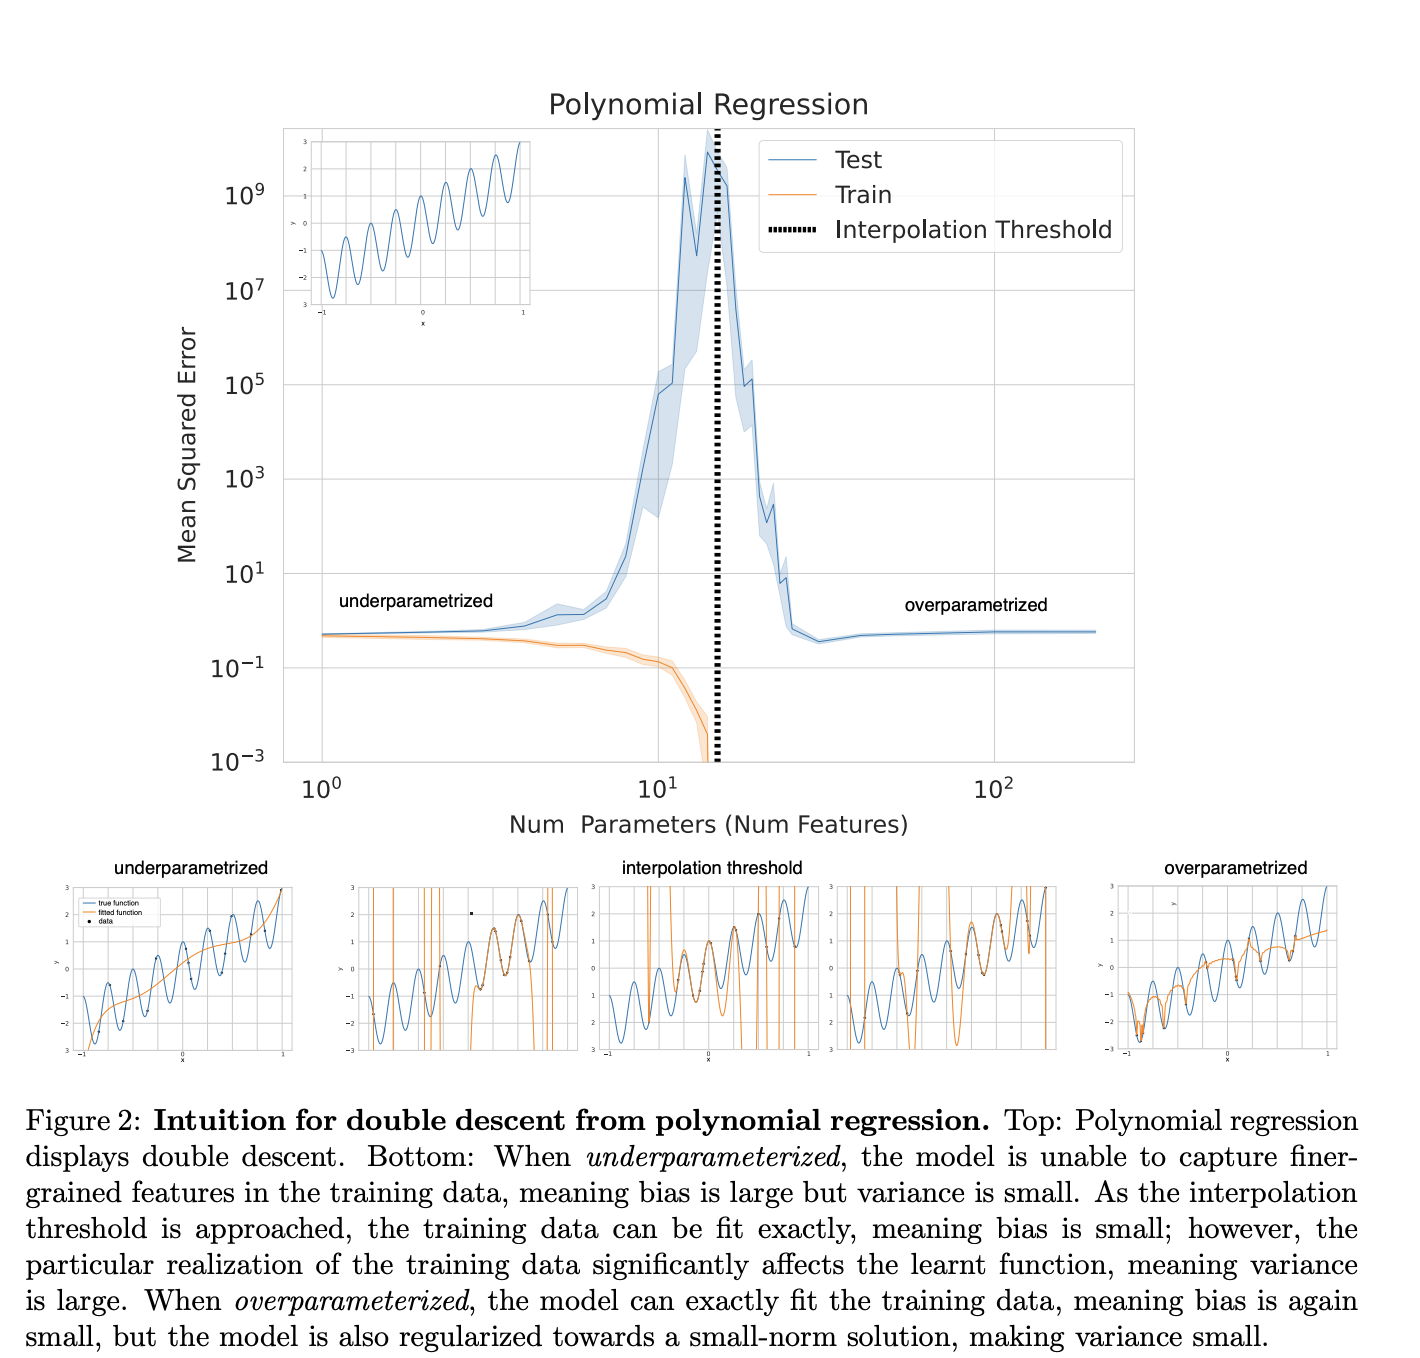

**Goals**
1. reproduce figure 2
2. make an equivalent figure for other regression techniques

The true function from the paper is $y(x) = 2x + cos(25x)$

Text(0.5, 1.0, 'True function')

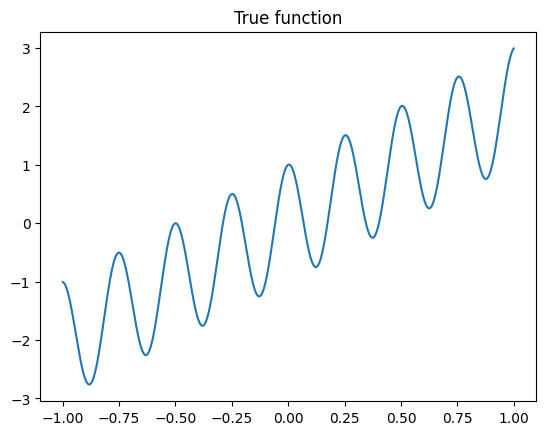

In [95]:
import numpy as np
import matplotlib.pyplot as plt

n = 10000
xx = np.linspace(-1, 1, n)
yy = 2*x + np.cos(25*x)

plt.plot(x, y)
plt.title("True function")

## With Polynomial Regression (original paper)

In [94]:
X.index

Index([ 961, 6386, 5171, 1352, 1646, 5718, 9677, 7190, 8276, 9069, 6796, 9167,
       9816, 6239, 3798, 1653, 2685,  617, 2290, 2675, 3468, 8084, 4471, 3435,
       4898, 7954, 3779, 8579, 9688,   41, 2865, 9469, 9156, 3454, 7196, 1645,
       5434, 9672,  475, 9026],
      dtype='int64')

In [109]:
pd.Series(xx).sample(40).values

array([ 0.78037804,  0.26752675,  0.9309931 ,  0.98539854, -0.94839484,
       -0.69756976,  0.97379738, -0.49874987,  0.6109611 , -0.6159616 ,
        0.12811281, -0.27612761, -0.44294429,  0.73077308,  0.26032603,
       -0.14351435, -0.85278528,  0.22472247,  0.16031603, -0.58075808,
        0.04790479,  0.35513551, -0.87818782, -0.09070907,  0.50075008,
       -0.53375338,  0.52255226, -0.71677168,  0.5519552 , -0.38253825,
        0.08370837,  0.11151115,  0.84218422, -0.06950695,  0.89378938,
       -0.8449845 ,  0.63236324, -0.07210721,  0.77977798, -0.25272527])

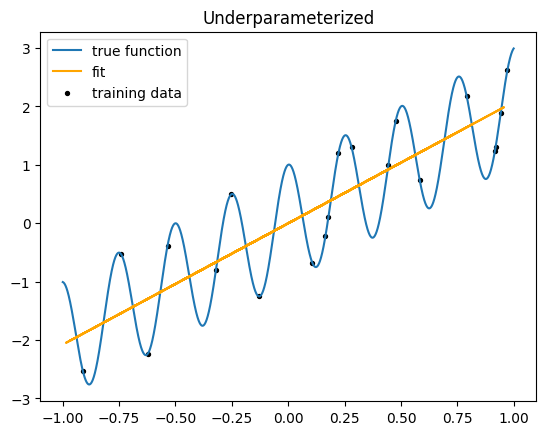

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import pandas as pd


d = 1
X = pd.Series(xx).sample(40)
y = yy[X.index]
X = X.values[:, None]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=20)


PolynomialRegression = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
PolynomialRegression.fit(X=X_train, y=y_train)

yhat = PolynomialRegression.predict(X_test)

plt.plot(xx, yy, label='true function')
plt.plot(X_test, yhat, c='orange', label='fit')
plt.scatter(X_train, y_train, c='black', s=8, label='training data')
plt.title("Underparameterized")
plt.legend();

In [114]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, yhat)

0.5245506757200284

In [115]:
from numpy import log10 as log
def mse_at(d, return_yhat=False):
    PolynomialRegression = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    PolynomialRegression.fit(X=X_train, y=y_train)
    yhat = PolynomialRegression.predict(X_test)
    mse_ = mse(y_test, yhat)
    if return_yhat:
        return mse_, yhat
    return mse(y_test, yhat)


## Plot as we scale up

In [116]:
yhats = []
ds = [1, 2, 10, 20, 30, 100]
for d in ds:
    _, yhat = mse_at(d, return_yhat=True)
    yhats.append(yhat)

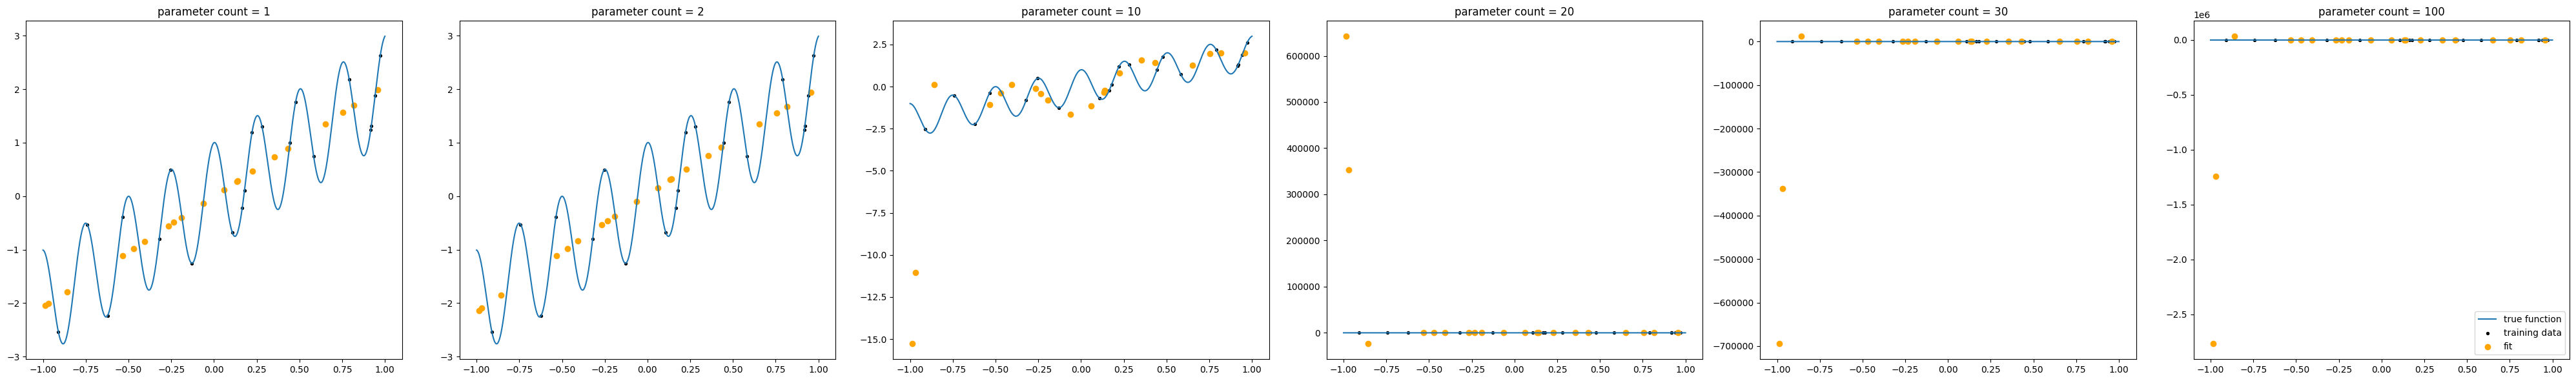

In [119]:
fig, axs = plt.subplots(1, len(ds), figsize=(40, len(ds)))

for i, ax in enumerate(axs.flatten()):
    ax.plot(xx, yy, label='true function')
    ax.scatter(X_train, y_train, c='black', s=8, label='training data')
    ax.scatter(X_test, yhats[i], c='orange', label='fit')
    ax.set_title(f"parameter count = {ds[i]}")

plt.legend();
plt.tight_layout()

what the fuck is happening here

## Calculate mean squared error for a bunch of num features
-- dashed line is interpolation threshold

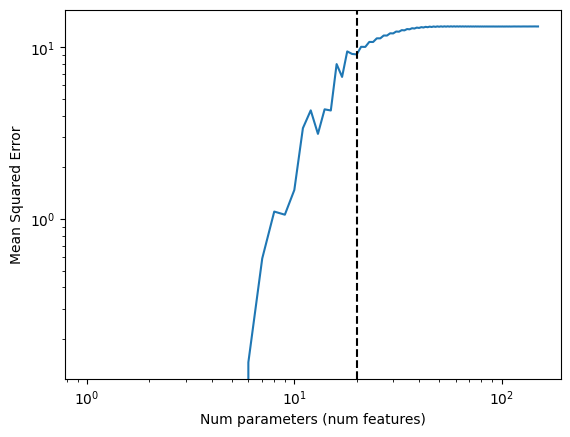

In [66]:
ds = [d for d in range(1,151)]
mses = [log(mse_at(d)) for d in ds]
plt.plot(ds, mses)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Num parameters (num features)')
plt.ylabel('Mean Squared Error')
plt.axvline(x=len(y_train), ls='--', c='black')

## I fucked up somewhere